In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("telco_join.csv")
data.head(6)

,State,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,...,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Phone,Account Length,Churn,Int'l Plan,VMail Plan
0,KS,25,265.1,197.4,244.7,10.0,1,110,45.07,99,...,91,11.01,3,2.70,415,382-4657,128,0,0,1
1,OH,26,161.6,195.5,254.4,13.7,1,123,27.47,103,...,103,11.45,3,3.70,415,371-7191,107,0,0,1
2,NJ,0,243.4,121.2,162.6,12.2,0,114,41.38,110,...,104,7.32,5,3.29,415,358-1921,137,0,0,0
3,OH,0,299.4,61.9,196.9,6.6,2,71,50.90,88,...,89,8.86,7,1.78,408,375-9999,84,0,1,0
4,OK,0,166.7,148.3,186.9,10.1,3,113,28.34,122,...,121,8.41,3,2.73,415,330-6626,75,0,1,0
5,AL,0,223.4,220.6,203.9,6.3,0,98,37.98,101,...,118,9.18,6,1.70,510,391-8027,118,0,1,0


In [5]:
data.drop(columns=['State', 'Phone'], inplace=True)

In [6]:
data['Churn'].unique()

array([0, 1], dtype=int64)

In [9]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    25
1    26
2     0
3     0
4     0
Name: VMail Message, dtype: int64

In [10]:
y.head()


0    25
1    26
2     0
3     0
4     0
Name: VMail Message, dtype: int64

In [11]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

C:\Users\ericksen\Anaconda2anacon\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ericksen\Anaconda2anacon\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.56676695, -0.07060962,  0.86674322, ..., -0.41167182,
        -0.32758048,  1.6170861 ],
       [-0.33373776, -0.10808036,  1.05857074, ..., -0.41167182,
        -0.32758048,  1.6170861 ],
       [ 1.16830364, -1.57338336, -0.75686906, ..., -0.41167182,
        -0.32758048, -0.61839626],
       ...,
       [ 0.01881963,  1.73193001, -0.1774313 , ..., -0.41167182,
        -0.32758048, -0.61839626],
       [ 0.62477766, -0.81608006, -1.21962822, ..., -0.41167182,
         3.05268496, -0.61839626],
       [ 1.00304237,  1.28030903,  0.80148231, ..., -0.41167182,
        -0.32758048,  1.6170861 ]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.61471346e+00, -1.23175606e+00,  1.03292113e+00, ...,
         4.57416592e-04,  1.41324717e-04,  1.87742571e-04],
       [-4.54454424e-01,  2.55998778e-01,  1.49293114e+00, ...,
        -6.14556083e-04,  3.70483479e-04, -1.90184425e-04],
       [ 3.41856162e-01,  1.00415092e+00,  2.08976281e+00, ...,
        -8.98117897e-04, -3.62070577e-04,  1.22959311e-04],
       ...,
       [ 9.94552767e-01,  1.75344321e+00, -9.28956777e-01, ...,
        -1.45976438e-03,  2.98466882e-04,  2.66381230e-04],
       [ 3.44367431e-01, -7.21671307e-01, -9.36290980e-01, ...,
         1.20695338e-03,  5.46771450e-04,  2.59753054e-04],
       [ 1.83791592e+00,  4.70715087e-01,  3.70792177e-01, ...,
         9.05374501e-04, -2.42385585e-04,  1.00238687e-04]])

In [13]:
covariance=pca.get_covariance()
#covariance

In [14]:
explained_variance=pca.explained_variance_
explained_variance

array([2.12693891e+00, 2.04352874e+00, 2.01845829e+00, 1.95639257e+00,
       1.26842127e+00, 1.07303098e+00, 1.05198569e+00, 1.01286060e+00,
       9.87519530e-01, 9.84325575e-01, 9.69266242e-01, 9.61929515e-01,
       9.49801082e-01, 6.00934872e-01, 7.23740073e-06, 7.83336650e-07,
       2.23243311e-07, 4.77491297e-08])

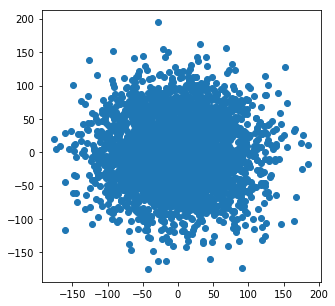

In [18]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

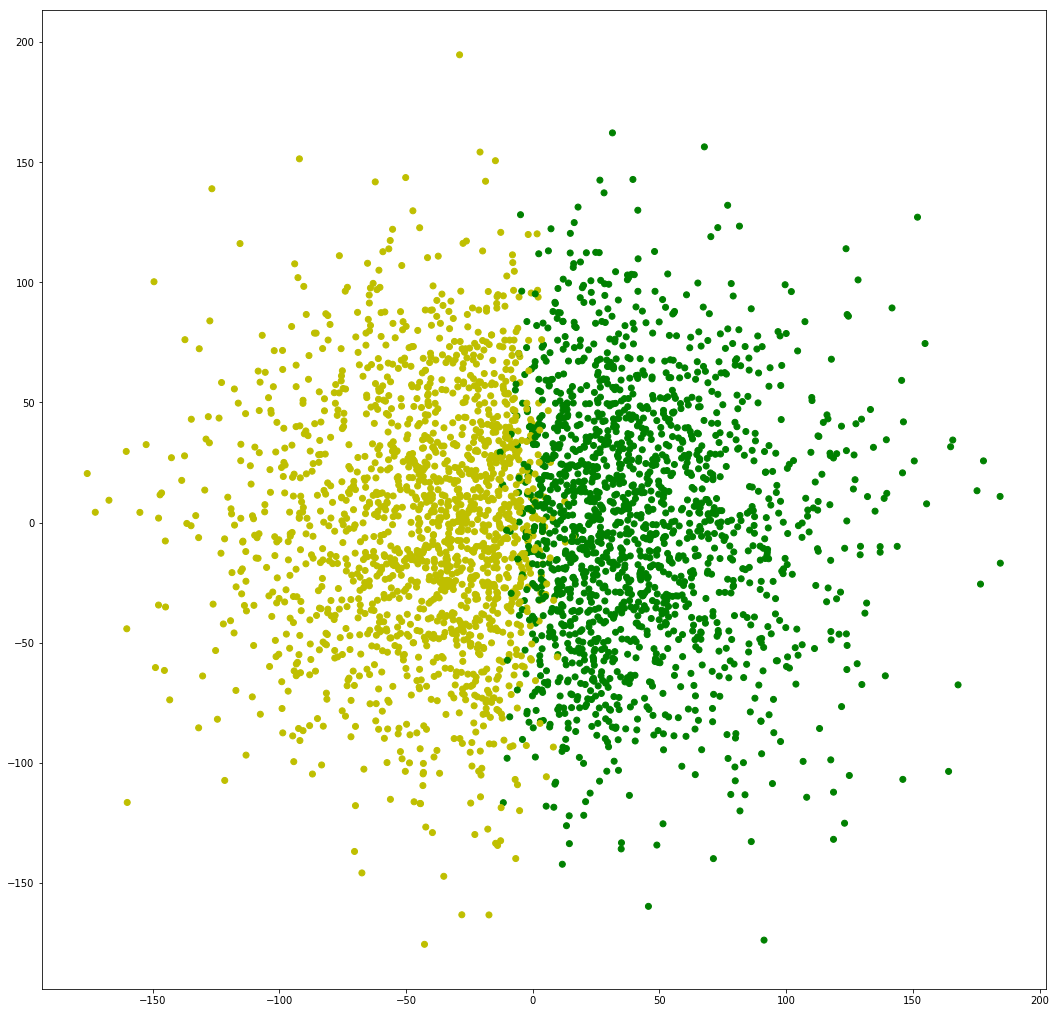

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=9)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (18,18))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [38]:
model_LR.fit(X_train,y_train)


C:\Users\ericksen\Anaconda2anacon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ericksen\Anaconda2anacon\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_LR.score(X_test, y_pred)


0.7526236881559221

In [42]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[502,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  1,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [43]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

ValueError: multiclass format is not supported

In [44]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ValueError: multiclass format is not supported